<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n250.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.814726,66.656340,79.752197,47.363087,289.141412,569.727762,629.782061,-60.054299
1,0.0,1.0,53.557646,92.321477,70.835209,26.780814,1045.751899,1299.247045,1133.230560,166.016486
2,0.0,2.0,67.175628,26.898534,25.810654,99.541895,89.880648,319.307359,62.038067,257.269292
3,0.0,3.0,39.455210,61.521298,46.194403,70.153238,-970.500101,-743.175952,566.699924,-1309.875876
4,0.0,4.0,30.209881,36.766858,49.433794,39.455255,-12.400695,153.465093,84.662139,68.802954
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.058735,98.308082,43.821292,95.893276,1540.377095,1882.458480,997.337958,885.120522
29996,999.0,26.0,32.345976,25.982218,99.017340,35.729253,-97.977340,105.097447,-232.635114,337.732561
29997,999.0,27.0,72.781566,75.286352,34.742846,25.369325,1091.088362,1309.268452,790.809411,518.459040
29998,999.0,28.0,75.592007,35.419429,21.020937,71.618700,-395.510210,-181.859137,532.902377,-714.761514


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.814726,66.656340,79.752197,47.363087,289.141412,569.727762,629.782061,-60.054299
1,0.0,1.0,53.557646,92.321477,70.835209,26.780814,1045.751899,1299.247045,1133.230560,166.016486
2,0.0,2.0,67.175628,26.898534,25.810654,99.541895,89.880648,319.307359,62.038067,257.269292
3,0.0,3.0,39.455210,61.521298,46.194403,70.153238,-970.500101,-743.175952,566.699924,-1309.875876
4,0.0,4.0,30.209881,36.766858,49.433794,39.455255,-12.400695,153.465093,84.662139,68.802954
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.058735,98.308082,43.821292,95.893276,1540.377095,1882.458480,997.337958,885.120522
29996,999.0,26.0,32.345976,25.982218,99.017340,35.729253,-97.977340,105.097447,-232.635114,337.732561
29997,999.0,27.0,72.781566,75.286352,34.742846,25.369325,1091.088362,1309.268452,790.809411,518.459040
29998,999.0,28.0,75.592007,35.419429,21.020937,71.618700,-395.510210,-181.859137,532.902377,-714.761514


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    76.814726  66.656340  79.752197  47.363087   289.141412   
      1.0    53.557646  92.321477  70.835209  26.780814  1045.751899   
      2.0    67.175628  26.898534  25.810654  99.541895    89.880648   
      3.0    39.455210  61.521298  46.194403  70.153238  -970.500101   
      4.0    30.209881  36.766858  49.433794  39.455255   -12.400695   
...                ...        ...        ...        ...          ...   
999.0 25.0   94.058735  98.308082  43.821292  95.893276  1540.377095   
      26.0   32.345976  25.982218  99.017340  35.729253   -97.977340   
      27.0   72.781566  75.286352  34.742846  25.369325  1091.088362   
      28.0   75.592007  35.419429  21.020937  71.618700  -395.510210   
      29.0   71.738854  27.322217  64.708433  76.067720  -142.508485   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     569.727762   629.782061   -60.054299  
      1.0    1299.247045  1133.230560   166.016486  
      2.0     319.307359    62.038067   257.269292  
      3.0    -743.175952   566.699924 -1309.875876  
      4.0     153.465093    84.662139    68.802954  
...                  ...          ...          ...  
999.0 25.0   1882.458480   997.337958   885.120522  
      26.0    105.097447  -232.635114   337.732561  
      27.0   1309.268452   790.809411   518.459040  
      28.0   -181.859137   532.902377  -714.761514  
      29.0    107.328739   141.167548   -33.838808  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    76.814726  66.656340  79.752197  47.363087   289.141412   
      1.0    53.557646  92.321477  70.835209  26.780814  1045.751899   
      2.0    67.175628  26.898534  25.810654  99.541895    89.880648   
      3.0    39.455210  61.521298  46.194403  70.153238  -970.500101   
      4.0    30.209881  36.766858  49.433794  39.455255   -12.400695   
...                ...        ...        ...        ...          ...   
999.0 25.0   94.058735  98.308082  43.821292  95.893276  1540.377095   
      26.0   32.345976  25.982218  99.017340  35.729253   -97.977340   
      27.0   72.781566  75.286352  34.742846  25.369325  1091.088362   
      28.0   75.592007  35.419429  21.020937  71.618700  -395.510210   
      29.0   71.738854  27.322217  64.708433  76.067720  -142.508485   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     569.727762   629.782061   -60.054299  
      1.0    1299.247045  1133.230560   166.016486  
      2.0     319.307359    62.038067   257.269292  
      3.0    -743.175952   566.699924 -1309.875876  
      4.0     153.465093    84.662139    68.802954  
...                  ...          ...          ...  
999.0 25.0   1882.458480   997.337958   885.120522  
      26.0    105.097447  -232.635114   337.732561  
      27.0   1309.268452   790.809411   518.459040  
      28.0   -181.859137   532.902377  -714.761514  
      29.0    107.328739   141.167548   -33.838808  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.814726,66.656340,79.752197,47.363087,289.141412,569.727762,629.782061,-60.054299
1,0.0,1.0,53.557646,92.321477,70.835209,26.780814,1045.751899,1299.247045,1133.230560,166.016486
2,0.0,2.0,67.175628,26.898534,25.810654,99.541895,89.880648,319.307359,62.038067,257.269292
3,0.0,3.0,39.455210,61.521298,46.194403,70.153238,-970.500101,-743.175952,566.699924,-1309.875876
4,0.0,4.0,30.209881,36.766858,49.433794,39.455255,-12.400695,153.465093,84.662139,68.802954
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.058735,98.308082,43.821292,95.893276,1540.377095,1882.458480,997.337958,885.120522
29996,999.0,26.0,32.345976,25.982218,99.017340,35.729253,-97.977340,105.097447,-232.635114,337.732561
29997,999.0,27.0,72.781566,75.286352,34.742846,25.369325,1091.088362,1309.268452,790.809411,518.459040
29998,999.0,28.0,75.592007,35.419429,21.020937,71.618700,-395.510210,-181.859137,532.902377,-714.761514


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    76.814726  66.656340  79.752197  47.363087   289.141412   
      1.0    53.557646  92.321477  70.835209  26.780814  1045.751899   
      2.0    67.175628  26.898534  25.810654  99.541895    89.880648   
      3.0    39.455210  61.521298  46.194403  70.153238  -970.500101   
      4.0    30.209881  36.766858  49.433794  39.455255   -12.400695   
...                ...        ...        ...        ...          ...   
999.0 25.0   94.058735  98.308082  43.821292  95.893276  1540.377095   
      26.0   32.345976  25.982218  99.017340  35.729253   -97.977340   
      27.0   72.781566  75.286352  34.742846  25.369325  1091.088362   
      28.0   75.592007  35.419429  21.020937  71.618700  -395.510210   
      29.0   71.738854  27.322217  64.708433  76.067720  -142.508485   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     569.727762   629.782061   -60.054299  
      1.0    1299.247045  1133.230560   166.016486  
      2.0     319.307359    62.038067   257.269292  
      3.0    -743.175952   566.699924 -1309.875876  
      4.0     153.465093    84.662139    68.802954  
...                  ...          ...          ...  
999.0 25.0   1882.458480   997.337958   885.120522  
      26.0    105.097447  -232.635114   337.732561  
      27.0   1309.268452   790.809411   518.459040  
      28.0   -181.859137   532.902377  -714.761514  
      29.0    107.328739   141.167548   -33.838808  

[30000 rows x 8 columns]

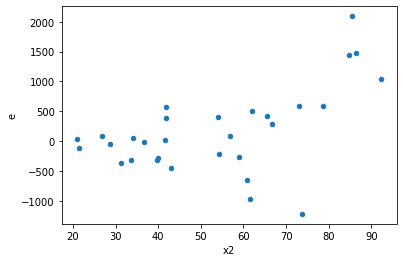

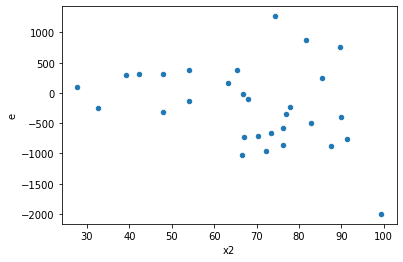

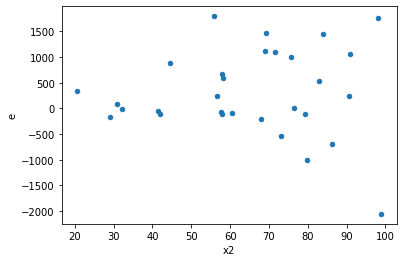

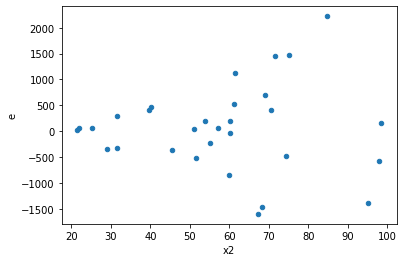

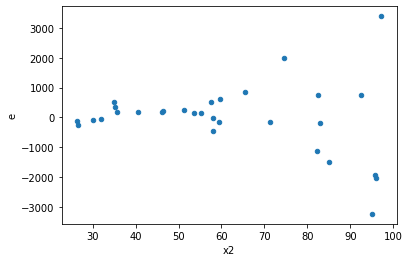

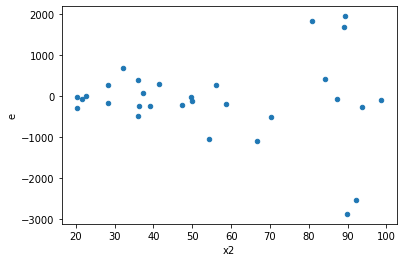

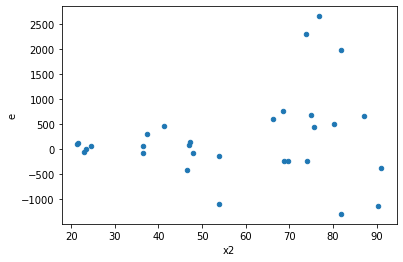

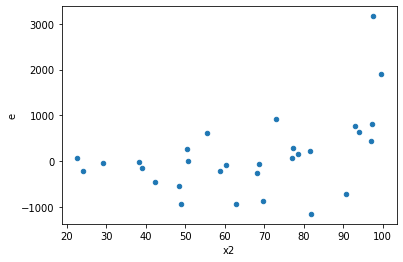

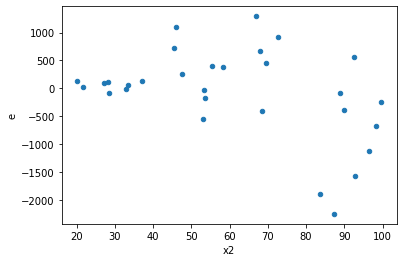

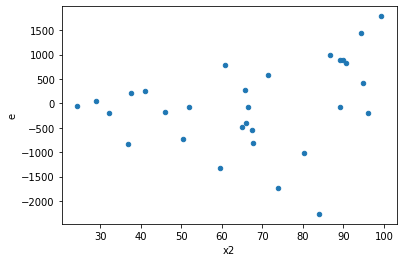

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,309310.9124793698,2183102.8435310596,38663.86405992122,272887.85544138245,7.057956106468331,0.012151531080742739,0.9939242344596286,0.0060757655403713695,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,1013343.0746432001,3522010.504032609,126667.88433040002,440251.31300407613,3.4756348488123976,0.09721121899935836,0.9513943905003208,0.04860560949967918,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,2460334.320738216,11712492.510924986,307541.790092277,1464061.5638656232,4.7605288485390425,0.04072596242378368,0.9796370187881082,0.02036298121189184,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,589426.123243831,6748509.993506627,73678.26540547887,843563.7491883284,11.449288939497743,0.002389140362152764,0.9988054298189236,0.001194570181076382,Reject001=0 : Heteroscedasticity
4.0,8.0,8.0,386053.07217307534,30866232.052305557,48256.63402163442,3858279.0065381946,79.95333874319644,1.5820672811805991e-06,0.9999992089663594,7.910336405902996e-07,Reject001=0 : Heteroscedasticity
5.0,8.0,8.0,732480.6464565302,24941797.401117988,91560.08080706628,3117724.6751397485,34.051135032409604,4.3275092671768434e-05,0.9999783624536641,2.1637546335884217e-05,Reject001=0 : Heteroscedasticity
6.0,8.0,8.0,353661.69493558654,14517530.860725952,44207.71186694832,1814691.357590744,41.049203429763786,2.1137848196906006e-05,0.9999894310759015,1.0568924098453003e-05,Reject001=0 : Heteroscedasticity
7.0,8.0,8.0,1108338.989820634,5961470.984884896,138542.37372757925,745183.873110612,5.378743362488457,0.028358784300283713,0.9858206078498581,0.014179392150141856,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,822832.3547435394,8716928.305730918,102854.04434294242,1089616.0382163648,10.593808393020488,0.0031285205337228117,0.9984357397331386,0.0015642602668614058,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,309310.9124793698,2183102.8435310596,38663.86405992122,272887.85544138245,7.057956106468331,0.012151531080742739,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,1013343.0746432001,3522010.504032609,126667.88433040002,440251.31300407613,3.4756348488123976,0.09721121899935836,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,2460334.320738216,11712492.510924986,307541.790092277,1464061.5638656232,4.7605288485390425,0.04072596242378368,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,589426.123243831,6748509.993506627,73678.26540547887,843563.7491883284,11.449288939497743,0.002389140362152764,Reject001=0 : Heteroscedasticity
4.0,8.0,8.0,386053.07217307534,30866232.052305557,48256.63402163442,3858279.0065381946,79.95333874319644,1.5820672811805991e-06,Reject001=0 : Heteroscedasticity
5.0,8.0,8.0,732480.6464565302,24941797.401117988,91560.08080706628,3117724.6751397485,34.051135032409604,4.3275092671768434e-05,Reject001=0 : Heteroscedasticity
6.0,8.0,8.0,353661.69493558654,14517530.860725952,44207.71186694832,1814691.357590744,41.049203429763786,2.1137848196906006e-05,Reject001=0 : Heteroscedasticity
7.0,8.0,8.0,1108338.989820634,5961470.984884896,138542.37372757925,745183.873110612,5.378743362488457,0.028358784300283713,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,822832.3547435394,8716928.305730918,102854.04434294242,1089616.0382163648,10.593808393020488,0.0031285205337228117,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    676
Reject001=1 : Homoscedasticity      324
Name: Result_test, dtype: int64